Julia Palomari Silva RM: 551910

Leticia Fontana RM:550289

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl

In [ ]:
disney = pd.read_csv("disney_plus_titles.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


#**Perguntas**

1° Quais são todas as categorias cadastradas

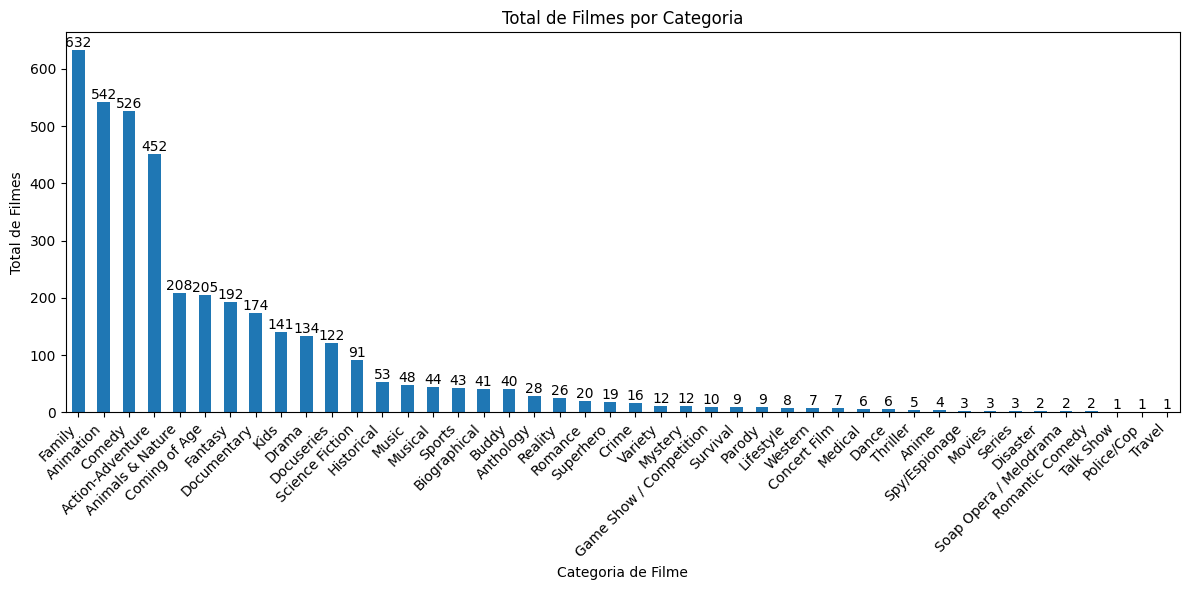

In [ ]:
categories_expanded = disney['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
categories_expanded.name = 'category'

disney_categories_expanded = disney.drop('listed_in', axis=1).join(categories_expanded)

category_movie_counts = disney_categories_expanded['category'].value_counts()

plt.figure(figsize=(12, 6))
bars = category_movie_counts.plot(kind='bar')
plt.xlabel('Categoria de Filme')
plt.ylabel('Total de Filmes')
plt.title('Total de Filmes por Categoria')
plt.xticks(rotation=45, ha='right')

for i, count in enumerate(category_movie_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

2° Qual é tipo é mais cadastrado


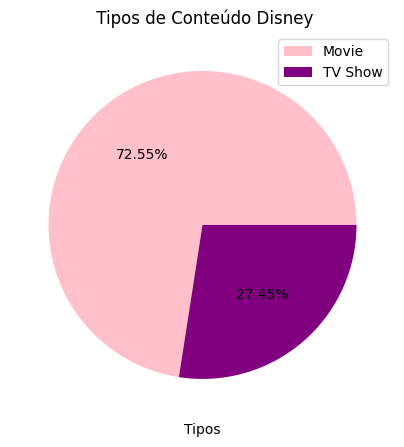

In [ ]:
type_counts = disney['type'].value_counts()

colors = ['pink','purple']

type_counts.plot(kind='pie', autopct='%0.2f%%', figsize=(5, 5), labels=None, colors=colors)
plt.ylabel('')
plt.xlabel('Tipos')
plt.legend(labels=disney['type'].unique(), loc="best")
plt.title(' Tipos de Conteúdo Disney')
plt.show()

3° Quais são o total de conteúdo para cada classificação de idade

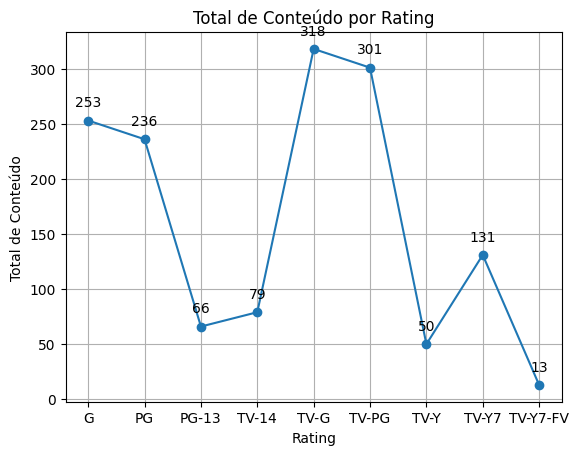

In [ ]:
rating_counts = disney['rating'].value_counts().sort_index()

plt.plot(rating_counts.index, rating_counts.values, marker='o', linestyle='-')
plt.xlabel('Rating')
plt.ylabel('Total de Conteúdo')
plt.title('Total de Conteúdo por Rating')
plt.grid(True)

# Rótulos
for x, y in zip(rating_counts.index, rating_counts.values):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

4° Qual a media de filme e series lançados

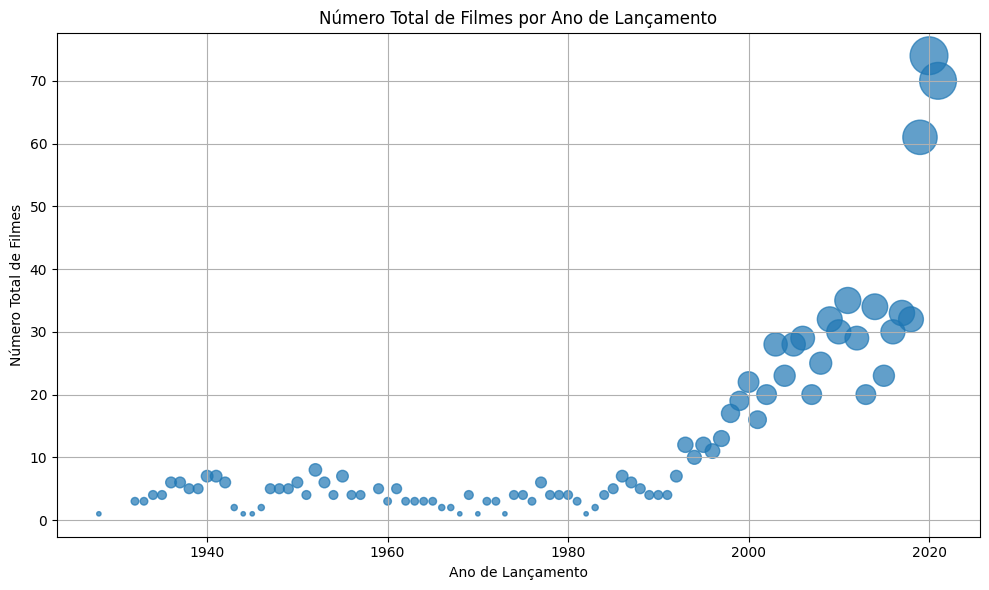

In [ ]:
total_filmes_por_ano = disney[disney['type'] == 'Movie'].groupby('release_year').size()

plt.figure(figsize=(10, 6))
plt.scatter(total_filmes_por_ano.index,           # Ano de lançamento
            total_filmes_por_ano.values,          # Número total de filmes lançados
            s=total_filmes_por_ano.values*10,    # Tamanho dos pontos (proporcional ao número total de filmes)
            alpha=0.7)                            # Transparência dos pontos
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número Total de Filmes')
plt.title('Número Total de Filmes por Ano de Lançamento')
plt.grid(True)
plt.tight_layout()
plt.show()

#####Series

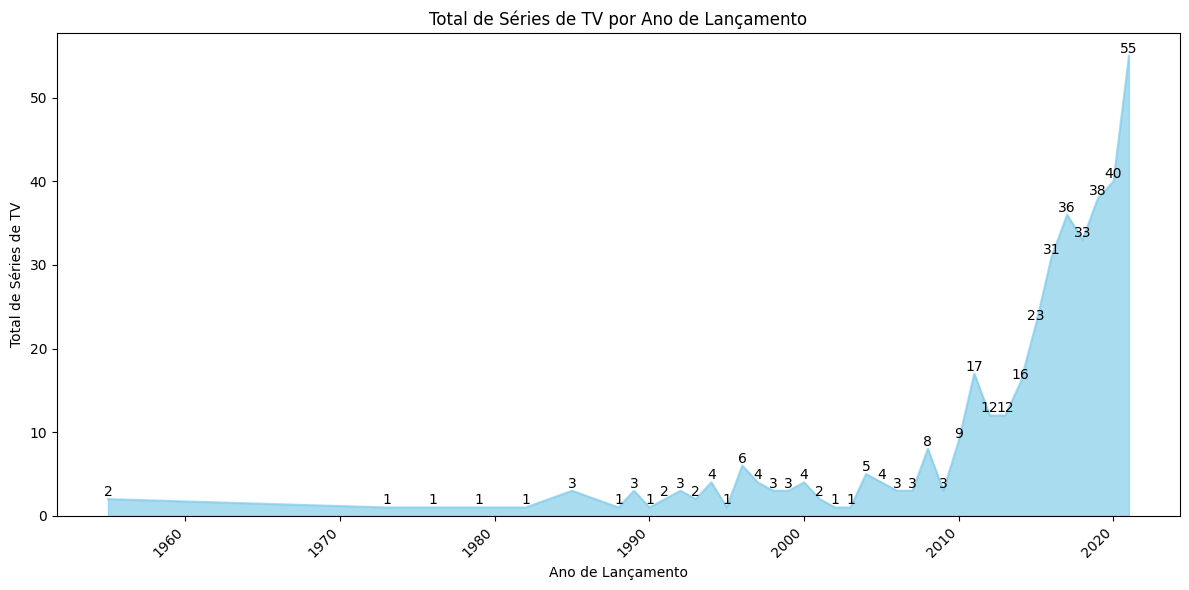

In [ ]:
tv_series_data = disney[disney['type'] == 'TV Show']

total_series_por_ano = tv_series_data['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
total_series_por_ano.plot(kind='area', color='skyblue', alpha=0.7)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Total de Séries de TV')
plt.title('Total de Séries de TV por Ano de Lançamento')
plt.xticks(rotation=45, ha='right')

#Rótulos
for ano, total in total_series_por_ano.items():
    plt.text(ano, total, str(total), ha='center', va='bottom')

plt.tight_layout()
plt.show()

5° Quais países são gravados os conteúdos

<ipython-input-10-1cf53e612d74>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


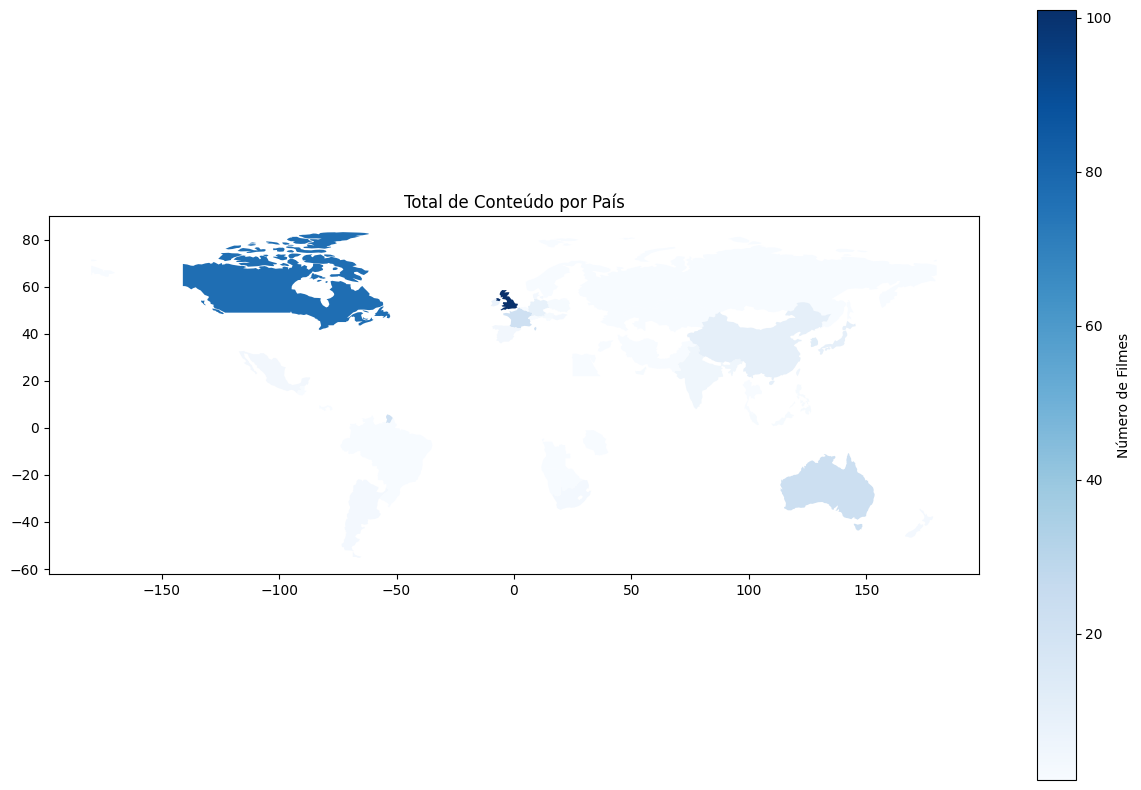

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

movies_data = disney.copy()
movies_data['country'] = movies_data['country'].str.split(', ')
movies_data_exploded = movies_data.explode('country')
movies_count_by_country = movies_data_exploded.groupby('country').size().reset_index(name='count')

world = world.merge(movies_count_by_country, how='left', left_on='name', right_on='country')

world.plot(column='count', cmap='Blues', figsize=(15, 10), legend=True, legend_kwds={'label': 'Número de Filmes'})
plt.title('Total de Conteúdo por País')
plt.show()

6° Qual a media de conteúdo adicionado pela plataforma

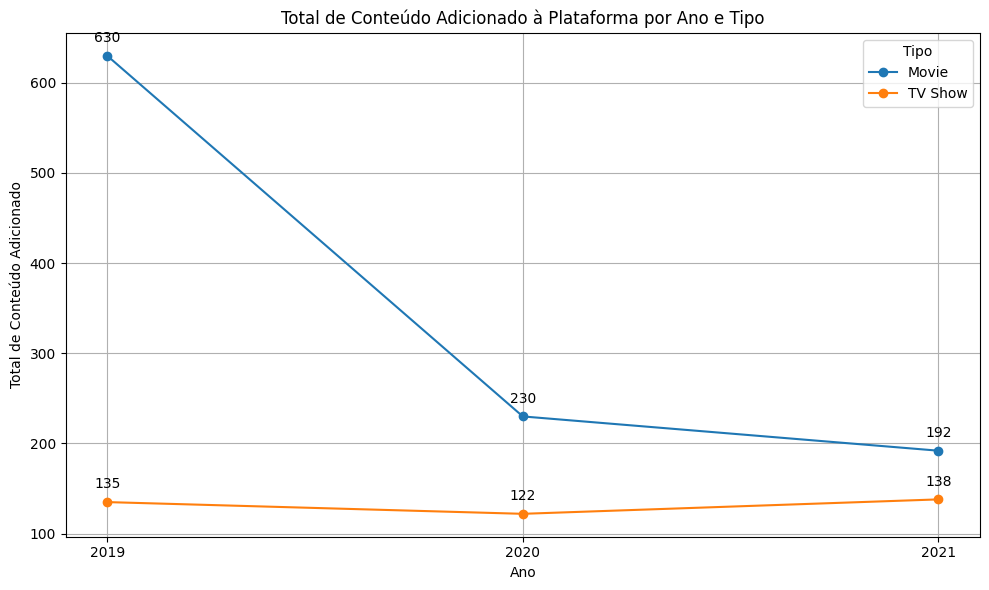

In [ ]:
disney['date_added'] = pd.to_datetime(disney['date_added'])
disney['year_added'] = disney['date_added'].dt.year

content_added_per_year_type = disney.groupby(['year_added', 'type']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
content_added_per_year_type.plot(kind='line', marker='o', ax=ax)

ax.set_xlabel('Ano')
ax.set_ylabel('Total de Conteúdo Adicionado')
ax.set_title('Total de Conteúdo Adicionado à Plataforma por Ano e Tipo')

plt.xticks(content_added_per_year_type.index)

for column in content_added_per_year_type.columns:
    for year, count in content_added_per_year_type[column].items():
        ax.annotate(f'{count}', (year, count), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()


7° Qual a media de duração dos filmes

<ipython-input-12-839feabdbee6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)
<ipython-input-12-839feabdbee6>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=movies_data['duration'], color='skyblue', shade=True)


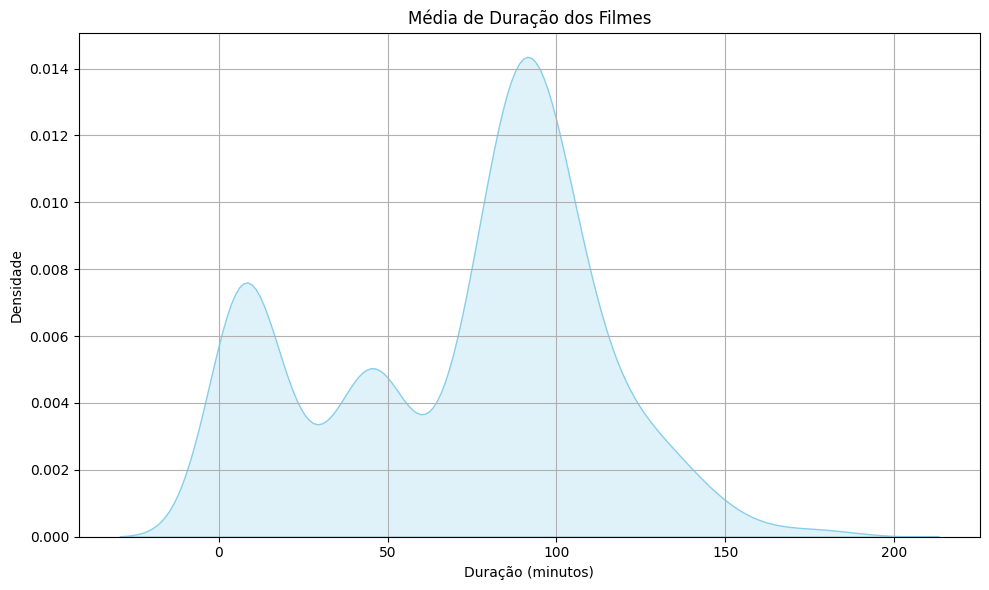

In [ ]:
movies_data = disney[disney['type'] == 'Movie']

movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=movies_data['duration'], color='skyblue', shade=True)
plt.xlabel('Duração (minutos)')
plt.ylabel('Densidade')
plt.title('Média de Duração dos Filmes')
plt.grid(True)
plt.tight_layout()
plt.show()
